# Notes to discuss with prof

1. since the data is very skewed it won't make sense for us to do cross validation where we randomly choose which data to use for training and which data to use for testing, because if do that after duplicating the low count data then most of the data in testing set will be in training set
2. what is the difference between training the network after performing oversampling and just training the network on the same data but more epochs
3. can we train the model with just 64 examples but keep the positive class data same and randomly choose rest of 32 negative class data?

In [2]:
from mygrad import Layer
from mygrad import Value

In [3]:
import pickle
with open('data.pckl', 'rb') as file:
    data = pickle.load(file)

In [4]:
from sklearn.utils import shuffle
data = shuffle(data)


In [5]:
X = [list(number) for number in data['number']]
Y = [label for label in data['label']]

len(X)

1024

In [6]:
for ix, row in enumerate(X):
    X[ix] = [Value(float(item)) for item in row]


In [7]:
Xtrain, Xtest, Ytrain, Ytest = X[:int(len(X)*0.8)], X[int(len(X)*0.8):], Y[:int(len(X)*0.8)], Y[int(len(X)*0.8):]

In [8]:
hiddenLayer1 = Layer(10, 1, activation='sigmoid')
outputLayer = Layer(11, 1, activation='sigmoid')
parameters =  outputLayer.parameters() + hiddenLayer1.parameters()
print(parameters)

[Value(data=-0.3174849244198765), Value(data=-0.7780827213381045), Value(data=0.5855880903982498), Value(data=-0.07189059114898821), Value(data=-0.1263555435837347), Value(data=-0.17180622531694323), Value(data=-0.9278671051941705), Value(data=-0.245305086271971), Value(data=-0.5369670808612268), Value(data=0.061759638608169576), Value(data=-0.631228031170673), Value(data=0.11664853598240188), Value(data=0.8365891266917365), Value(data=0.7737916317219506), Value(data=0.23072540390941554), Value(data=0.47135328029319545), Value(data=0.7865041380354578), Value(data=0.43513043588713507), Value(data=-0.31474058357190815), Value(data=-0.2536126953236517), Value(data=0.4571751250735274), Value(data=0.8939061322926636), Value(data=0.7469065098685954)]


In [9]:
def predict(x):
    x1 = hiddenLayer1(x)    
    final = outputLayer([x1] + x)
    return final

In [10]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
def getAccuracy(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return accuracy_score(Y, predicted)
def getPrecision(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return precision_score(Y, predicted)
def getf1(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return f1_score(Y, predicted)
def getRecall(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return recall_score(Y, predicted)


In [11]:
getAccuracy(Xtest, Ytest)

0.5365853658536586

# Without momentum term

In [46]:
losss = []
prevchange = [0]*len(parameters)
beta = 0 # parameter for momentum update set to 0 so no momentum term present

In [47]:
lr = 1
epochs = 1000

for _ in range(epochs):
    Y_pred = [predict(x) for x in Xtrain]
    loss = Value(0)
    for i in range(len(Ytrain)):
        if Ytrain[i] == 1:
            loss -= Y_pred[i].log()
        else:
            loss -= (Value(1) - Y_pred[i]).log()
    loss = loss/len(X)
    loss.backward()

    for ix, p in enumerate(parameters):
        change = lr*p.grad
        p.data = p.data -change
        prevchange[ix] = change

    for p in parameters:
        p.grad = 0
    losss.append(loss.data)
    print('loss:', loss.data,'epoch:', _)
print( 'test accuracy:', getAccuracy(Xtest, Ytest),'train accuracy:', getAccuracy(Xtrain, Ytrain))
print( 'test f1score:', getf1(Xtest, Ytest),'train f1score:', getf1(Xtrain, Ytrain))
print( 'test recallscore:', getRecall(Xtest, Ytest),'train recallscore:', getRecall(Xtrain, Ytrain))
print( 'test precisionscore', getPrecision(Xtest, Ytest),'train precisionscore', getPrecision(Xtrain, Ytrain))


loss: 0.739235736952122 epoch: 0
loss: 0.6494775665783156 epoch: 1
loss: 0.623464786531649 epoch: 2
loss: 0.6096740320139341 epoch: 3
loss: 0.598120344690557 epoch: 4
loss: 0.5874393921266412 epoch: 5
loss: 0.5774207540639034 epoch: 6
loss: 0.5679964635504203 epoch: 7
loss: 0.5591183633335417 epoch: 8
loss: 0.5507437758496049 epoch: 9
loss: 0.5428337711011796 epoch: 10
loss: 0.5353528183667327 epoch: 11
loss: 0.5282685599703595 epoch: 12
loss: 0.5215515799993778 epoch: 13
loss: 0.5151751650918802 epoch: 14
loss: 0.5091150655274728 epoch: 15
loss: 0.5033492636616617 epoch: 16
loss: 0.4978577545551482 epoch: 17
loss: 0.49262234176719 epoch: 18
loss: 0.4876264498319283 epoch: 19
loss: 0.482854953876357 epoch: 20
loss: 0.4782940260989493 epoch: 21
loss: 0.4739309983395042 epoch: 22
loss: 0.46975423967226226 epoch: 23
loss: 0.46575304779528365 epoch: 24
loss: 0.46191755292901365 epoch: 25
loss: 0.4582386329447815 epoch: 26
loss: 0.4547078384960658 epoch: 27
loss: 0.45131732700457733 epoch: 

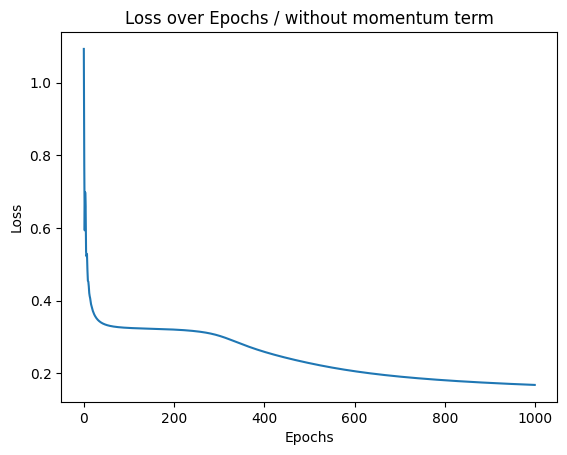

In [21]:
import matplotlib.pyplot as plt

plt.plot(losss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs / without momentum term')
plt.show()


# with momentum term

In [17]:
hiddenLayer1 = Layer(10, 1, activation='sigmoid')
outputLayer = Layer(11, 1, activation='sigmoid')
parameters =  outputLayer.parameters() + hiddenLayer1.parameters()
print(parameters)

[Value(data=0.7677388072958649), Value(data=-0.5079246340186356), Value(data=-0.527082292106972), Value(data=-0.4175075360849212), Value(data=0.3494093472628361), Value(data=0.5981064211027798), Value(data=0.5241825035783569), Value(data=0.9041395496797298), Value(data=0.5680131563857627), Value(data=0.7290639112916186), Value(data=0.7551646066056565), Value(data=0.5392073885149364), Value(data=0.9693227835381586), Value(data=-0.23791032308500037), Value(data=0.22528933034397225), Value(data=0.10960043004855424), Value(data=0.12391082783408125), Value(data=0.20725948196407895), Value(data=-0.656092688414563), Value(data=0.12590407458242314), Value(data=-0.5568542960694707), Value(data=0.7128493937526847), Value(data=0.9737869656019833)]


In [18]:
losss = []
prevchange = [0]*len(parameters)
beta = 0.7 # parameter for momentum update set to 0 so no momentum term present

In [19]:
lr = 1
epochs = 1000

for _ in range(epochs):
    Y_pred = [predict(x) for x in Xtrain]
    loss = Value(0)
    for i in range(len(Ytrain)):
        if Ytrain[i] == 1:
            loss -= Y_pred[i].log()
        else:
            loss -= (Value(1) - Y_pred[i]).log()
    loss = loss/len(X)
    loss.backward()

    for ix, p in enumerate(parameters):
        change = lr*p.grad + beta*prevchange[ix]
        p.data = p.data -change
        prevchange[ix] = change

    for p in parameters:
        p.grad = 0
    losss.append(loss.data)
    print('loss:', loss.data,'epoch:', _)
print( 'test accuracy:', getAccuracy(Xtest, Ytest),'train accuracy:', getAccuracy(Xtrain, Ytrain))
print( 'test f1score:', getf1(Xtest, Ytest),'train f1score:', getf1(Xtrain, Ytrain))
print( 'test recallscore:', getRecall(Xtest, Ytest),'train recallscore:', getRecall(Xtrain, Ytrain))
print( 'test precisionscore', getPrecision(Xtest, Ytest),'train precisionscore', getPrecision(Xtrain, Ytrain))


loss: 1.0927674599901165 epoch: 0
loss: 0.7698199545574081 epoch: 1
loss: 0.593645302037565 epoch: 2
loss: 0.6982273088031856 epoch: 3
loss: 0.6592184627130938 epoch: 4
loss: 0.534606518782021 epoch: 5
loss: 0.5220540692854311 epoch: 6
loss: 0.528030203055519 epoch: 7
loss: 0.48428596323884154 epoch: 8
loss: 0.4546210947628464 epoch: 9
loss: 0.4523511241042922 epoch: 10
loss: 0.4395162486906689 epoch: 11
loss: 0.42111807126248785 epoch: 12
loss: 0.41272528623211635 epoch: 13
loss: 0.4069112241111924 epoch: 14
loss: 0.3979890141727989 epoch: 15
loss: 0.3904004388977889 epoch: 16
loss: 0.38554111803938995 epoch: 17
loss: 0.38080391127685226 epoch: 18
loss: 0.3758562205745599 epoch: 19
loss: 0.371822717146057 epoch: 20
loss: 0.36854177576746333 epoch: 21
loss: 0.365395894900971 epoch: 22
loss: 0.36244421013023104 epoch: 23
loss: 0.35989311317283523 epoch: 24
loss: 0.35763180291798724 epoch: 25
loss: 0.35551889253184277 epoch: 26
loss: 0.3535714192269728 epoch: 27
loss: 0.3518173611469482 

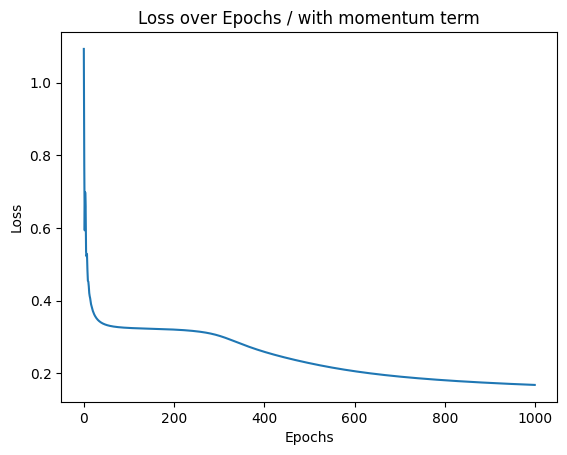

In [20]:
import matplotlib.pyplot as plt

plt.plot(losss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs / with momentum term')
plt.show()


# 4 fold cross validation with momentum

In [55]:
accuracies = []
f1scores = []
precisionscores = []
recallscores = []

for i in range(4):
    print('cross no.', i+1)
    Xtrain, Xtest = X[:len(X)*i//4] + X[len(X)*(i+1)//4:], X[len(X)*i//4:len(X)*(i+1)//4] 
    Ytrain, Ytest = Y[:len(X)*i//4] + Y[len(X)*(i+1)//4:], Y[len(X)*i//4:len(X)*(i+1)//4] 

    hiddenLayer1 = Layer(10, 1, activation='sigmoid')
    outputLayer = Layer(11, 1, activation='sigmoid')
    parameters =  outputLayer.parameters() + hiddenLayer1.parameters()

    losss = []
    prevchange = [0]*len(parameters)
    beta = 0.7 # parameter for momentum update
    lr = 1
    epochs = 2000

    for _ in range(epochs):
        Y_pred = [predict(x) for x in Xtrain]
        loss = Value(0)
        for i in range(len(Ytrain)):
            if Ytrain[i] == 1:
                loss -= Y_pred[i].log()
            else:
                loss -= (Value(1) - Y_pred[i]).log()
        loss = loss/len(X)
        loss.backward()

        for ix, p in enumerate(parameters):
            change = lr*p.grad 
            p.data = p.data -change
            prevchange[ix] = change

        for p in parameters:
            p.grad = 0
        losss.append(loss.data)
        print('loss:', loss.data,'epoch:', _)
    print( 'accuracy','test', getAccuracy(Xtest, Ytest),'train', getAccuracy(Xtrain, Ytrain))
    print( 'f1score','test', getf1(Xtest, Ytest),'train', getf1(Xtrain, Ytrain))
    print( 'precision','test', getPrecision(Xtest, Ytest),'train', getPrecision(Xtrain, Ytrain))
    print( 'recall','test',getRecall(Xtest, Ytest),'train',getRecall(Xtrain, Ytrain))
    print()
    accuracies.append(getAccuracy(Xtest, Ytest))
    f1scores.append(getf1(Xtest, Ytest))
    precisionscores.append(getPrecision(Xtest, Ytest))
    recallscores.append(getRecall(Xtest, Ytest))

cross no. 1
loss: 0.8208302662557622 epoch: 0
loss: 0.6523598281059079 epoch: 1
loss: 0.5968326548688919 epoch: 2
loss: 0.5774657036905125 epoch: 3
loss: 0.5648890683944229 epoch: 4
loss: 0.5538877943270104 epoch: 5
loss: 0.543731373852355 epoch: 6
loss: 0.5342781637264158 epoch: 7
loss: 0.5254596639023814 epoch: 8
loss: 0.517219775626239 epoch: 9
loss: 0.5095079007158981 epoch: 10
loss: 0.502278036431135 epoch: 11
loss: 0.4954884690171494 epoch: 12
loss: 0.4891014919251181 epoch: 13
loss: 0.48308310409923855 epoch: 14
loss: 0.4774026977314257 epoch: 15
loss: 0.4720327472625553 epoch: 16
loss: 0.46694850858589404 epoch: 17
loss: 0.46212773453138234 epoch: 18
loss: 0.45755041035187666 epoch: 19
loss: 0.4531985111158839 epoch: 20
loss: 0.44905578157110704 epoch: 21
loss: 0.44510753809832443 epoch: 22
loss: 0.441340491744955 epoch: 23
loss: 0.43774259093928447 epoch: 24
loss: 0.4343028822776534 epoch: 25
loss: 0.43101138769720543 epoch: 26
loss: 0.42785899635614794 epoch: 27
loss: 0.42483

In [57]:
print('final accuracy:', sum(accuracies)/4)
print('final f1score', sum(f1scores)/4)
print('final precisionscore', sum(precisionscores)/4)
print('final recallscore', sum(recallscores)/4)

final accuracy: 0.8515625
final f1score 0.8607314988932636
final precisionscore 0.8138813778720649
final recallscore 0.9157252082620108


# Network Analysis

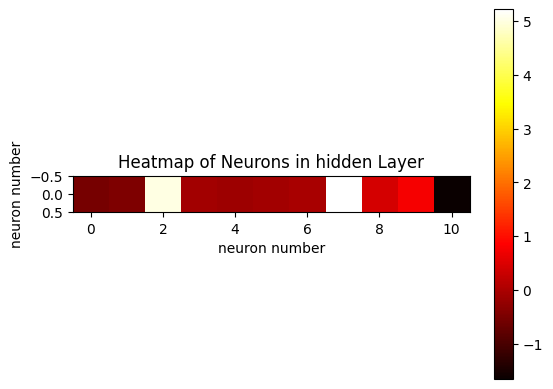

Text(0, 0.5, 'neuron number')

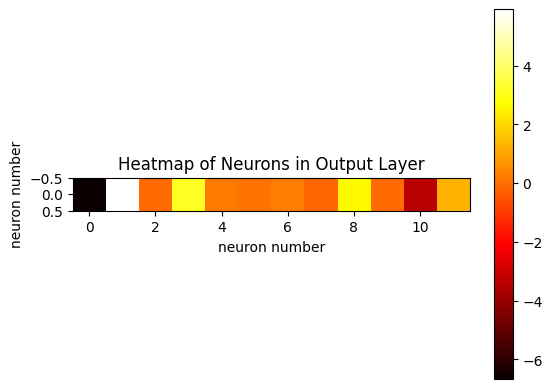

In [58]:
neuron1weightsbias = [v.data for v in hiddenLayer1.neurons[0].w] + [hiddenLayer1.neurons[0].b.data]
outputneuronweightsbias = [v.data for v in outputLayer.neurons[0].w] + [outputLayer.neurons[0].b.data]
import matplotlib.pyplot as plt

plt.imshow([neuron1weightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in hidden Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')
plt.show()

plt.imshow([outputneuronweightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in Output Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')


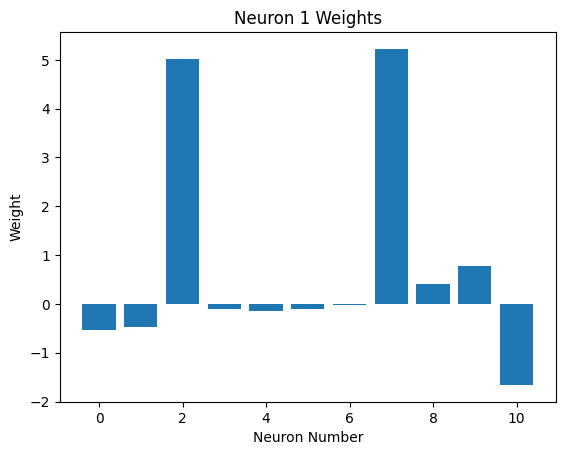

In [59]:
plt.bar(range(len(neuron1weightsbias)), neuron1weightsbias)
plt.xlabel('Neuron Number')
plt.ylabel('Weight')
plt.title('Neuron 1 Weights')
plt.show()


# without momentum term/

In [12]:
accuracies = []
f1scores = []
precisionscores = []
recallscores = []

for i in range(4):
    print('cross no.', i+1)
    Xtrain, Xtest = X[:len(X)*i//4] + X[len(X)*(i+1)//4:], X[len(X)*i//4:len(X)*(i+1)//4] 
    Ytrain, Ytest = Y[:len(X)*i//4] + Y[len(X)*(i+1)//4:], Y[len(X)*i//4:len(X)*(i+1)//4] 

    hiddenLayer1 = Layer(10, 1, activation='sigmoid')
    outputLayer = Layer(11, 1, activation='sigmoid')
    parameters =  outputLayer.parameters() + hiddenLayer1.parameters()

    losss = []
    prevchange = [0]*len(parameters)
    beta = 0 # parameter for momentum update
    lr = 1
    epochs = 2000

    for _ in range(epochs):
        Y_pred = [predict(x) for x in Xtrain]
        loss = Value(0)
        for i in range(len(Ytrain)):
            if Ytrain[i] == 1:
                loss -= Y_pred[i].log()
            else:
                loss -= (Value(1) - Y_pred[i]).log()
        loss = loss/len(X)
        loss.backward()

        for ix, p in enumerate(parameters):
            change = lr*p.grad
            p.data = p.data -change
            prevchange[ix] = change

        for p in parameters:
            p.grad = 0
        losss.append(loss.data)
        print('loss:', loss.data,'epoch:', _)
    print( 'accuracy','test', getAccuracy(Xtest, Ytest),'train', getAccuracy(Xtrain, Ytrain))
    print( 'f1score','test', getf1(Xtest, Ytest),'train', getf1(Xtrain, Ytrain))
    print( 'precision','test', getPrecision(Xtest, Ytest),'train', getPrecision(Xtrain, Ytrain))
    print( 'recall','test',getRecall(Xtest, Ytest),'train',getRecall(Xtrain, Ytrain))
    print()
    accuracies.append(getAccuracy(Xtest, Ytest))
    f1scores.append(getf1(Xtest, Ytest))
    precisionscores.append(getPrecision(Xtest, Ytest))
    recallscores.append(getRecall(Xtest, Ytest))

cross no. 1
loss: 0.7996497372284636 epoch: 0
loss: 0.6691410032566295 epoch: 1
loss: 0.6161204212080233 epoch: 2
loss: 0.5905746700265753 epoch: 3
loss: 0.5724223011940256 epoch: 4
loss: 0.556747198789578 epoch: 5
loss: 0.5425286127561041 epoch: 6
loss: 0.5295246736956203 epoch: 7
loss: 0.5176306729845036 epoch: 8
loss: 0.5067626213466218 epoch: 9
loss: 0.49683904054861605 epoch: 10
loss: 0.4877796187580071 epoch: 11
loss: 0.4795063440794143 epoch: 12
loss: 0.4719447169808549 epoch: 13
loss: 0.4650246715576849 epoch: 14
loss: 0.45868117527161206 epoch: 15
loss: 0.45285454146729737 epoch: 16
loss: 0.4474905054071889 epoch: 17
loss: 0.44254011793303427 epoch: 18
loss: 0.4379595078962274 epoch: 19
loss: 0.43370955799643546 epoch: 20
loss: 0.4297555305975522 epoch: 21
loss: 0.426066671848265 epoch: 22
loss: 0.42261581488921757 epoch: 23
loss: 0.4193789965166741 epoch: 24
loss: 0.4163350965263084 epoch: 25
loss: 0.4134655050242201 epoch: 26
loss: 0.4107538201119787 epoch: 27
loss: 0.408185

In [13]:
print('final accuracy:', sum(accuracies)/4)
print('final f1score', sum(f1scores)/4)
print('final precisionscore', sum(precisionscores)/4)
print('final recallscore', sum(recallscores)/4)

final accuracy: 0.857421875
final f1score 0.8656804896071906
final precisionscore 0.8006950499520671
final recallscore 0.9429592457420924


# Network Analysis

In [ ]:
neuron1weightsbias = [v.data for v in hiddenLayer1.neurons[0].w] + [hiddenLayer1.neurons[0].b.data]
outputneuronweightsbias = [v.data for v in outputLayer.neurons[0].w] + [outputLayer.neurons[0].b.data]
import matplotlib.pyplot as plt

plt.imshow([neuron1weightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in hidden Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')
plt.show()

plt.imshow([outputneuronweightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in Output Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')


In [ ]:
plt.bar(range(len(neuron1weightsbias)), neuron1weightsbias)
plt.xlabel('Neuron Number')
plt.ylabel('Weight')
plt.title('Neuron 1 Weights')
plt.show()


# Saving parameters

In [60]:
import pickle as pkl 

with open('parameters/neuron1weightsbias_fn.pckl', 'wb') as file:
    pkl.dump(neuron1weightsbias, file)
with open('parameters/outputneuronweightsbias_fn.pckl', 'wb') as file:
    pkl.dump(outputneuronweightsbias, file)

In [36]:
# Load model

def loadModel():
    neuron1weightsbias, outputneuronweightsbias = [], []
    with open(f'parameters/neuron1weightsbias2.pckl', 'rb') as file:
        neuron1weightsbias = pickle.load(file)
    with open('parameters/outputneuronweightsbias2.pckl', 'rb') as file:
        outputneuronweightsbias = pickle.load(file)
    hiddenLayer1_ = Layer(10, 1)
    outputLayer_ = Layer(11, 1)

    hiddenLayer1_.neurons[0].w = [Value(i) for i in neuron1weightsbias[:-1]]
    hiddenLayer1_.neurons[0].b = Value(neuron1weightsbias[-1])

    outputLayer_.neurons[0].w = [Value(i) for i in outputneuronweightsbias[:-1]]
    outputLayer_.neurons[0].b = Value(outputneuronweightsbias[-1])
    return hiddenLayer1_, outputLayer_, neuron1weightsbias, outputneuronweightsbias

In [37]:
import pickle

hiddenLayer1, outputLayer, neuron1weightsbias, outputneuronweightsbias = loadModel()

In [38]:
getAccuracy(Xtest, Ytest)

0.9560975609756097

In [39]:
[round(i)for i in neuron1weightsbias]

[0, 2, 8, 6, -4, 4, -6, -8, -2, 0, -3]